In [200]:
# imports
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from skimage.io import imread,imsave
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage.morphology import binary_dilation,binary_erosion
%matplotlib inline

In [201]:
def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [202]:
def get_skeleton(input_img,reverse_bin=False):
    # convert to grey scale
    input_img = input_img.astype(np.float64) / np.max(input_img)
    input_img = 255 * input_img
    input_img = input_img.astype(np.uint8)

    # binarization
    t = sk.filters.threshold_local(input_img, 21, offset=10)
    input_img = input_img < t

    # remove noise 
    input_img = binary_dilation(input_img)
    input_img = binary_erosion(input_img)

    # calculate the skeleton 
    skeleton_img = sk.morphology.skeletonize(input_img)
    skeleton_img = skeleton_img*1
    if reverse_bin:
        skeleton_img = skeleton_img == 0
        skeleton_img = skeleton_img*1
    return skeleton_img

In [203]:
def get_ToS(skeleton_img,type):
    result = skeleton_img
    if type == "sob":
        result = sk.filters.sobel(skeleton_img)
    elif type == "prew":
        result = sk.filters.prewitt(skeleton_img)
    elif type == "rob":
        result = sk.filters.roberts(skeleton_img)
    elif type == "sch":
        result = sk.filters.scharr(skeleton_img)
    elif type == "lap":
        result = sk.filters.laplace(skeleton_img)
    elif type == "hog":
        _,result = sk.feature.hog(skeleton_img,visualize=True)
    return result

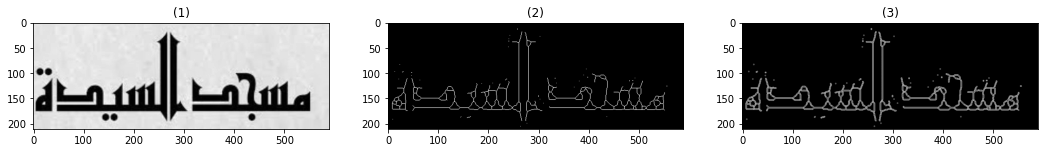

In [205]:
# read image
original_img = imread("./ACDB/ACdata_base/7/1127.jpg", as_gray=True)
img = get_skeleton(original_img)
show_images([original_img,img,get_ToS(img,"sch")])